saved means/means_n10_runs10.csv
saved means/means_n10_runs100.csv
saved means/means_n10_runs1000.csv
saved means/means_n10_runs10000.csv
saved means/means_n100_runs10.csv
saved means/means_n100_runs100.csv
saved means/means_n100_runs1000.csv
saved means/means_n100_runs10000.csv
saved means/means_n1000_runs10.csv
saved means/means_n1000_runs100.csv
saved means/means_n1000_runs1000.csv
saved means/means_n1000_runs10000.csv
saved means/means_n10000_runs10.csv
saved means/means_n10000_runs100.csv
saved means/means_n10000_runs1000.csv
saved means/means_n10000_runs10000.csv


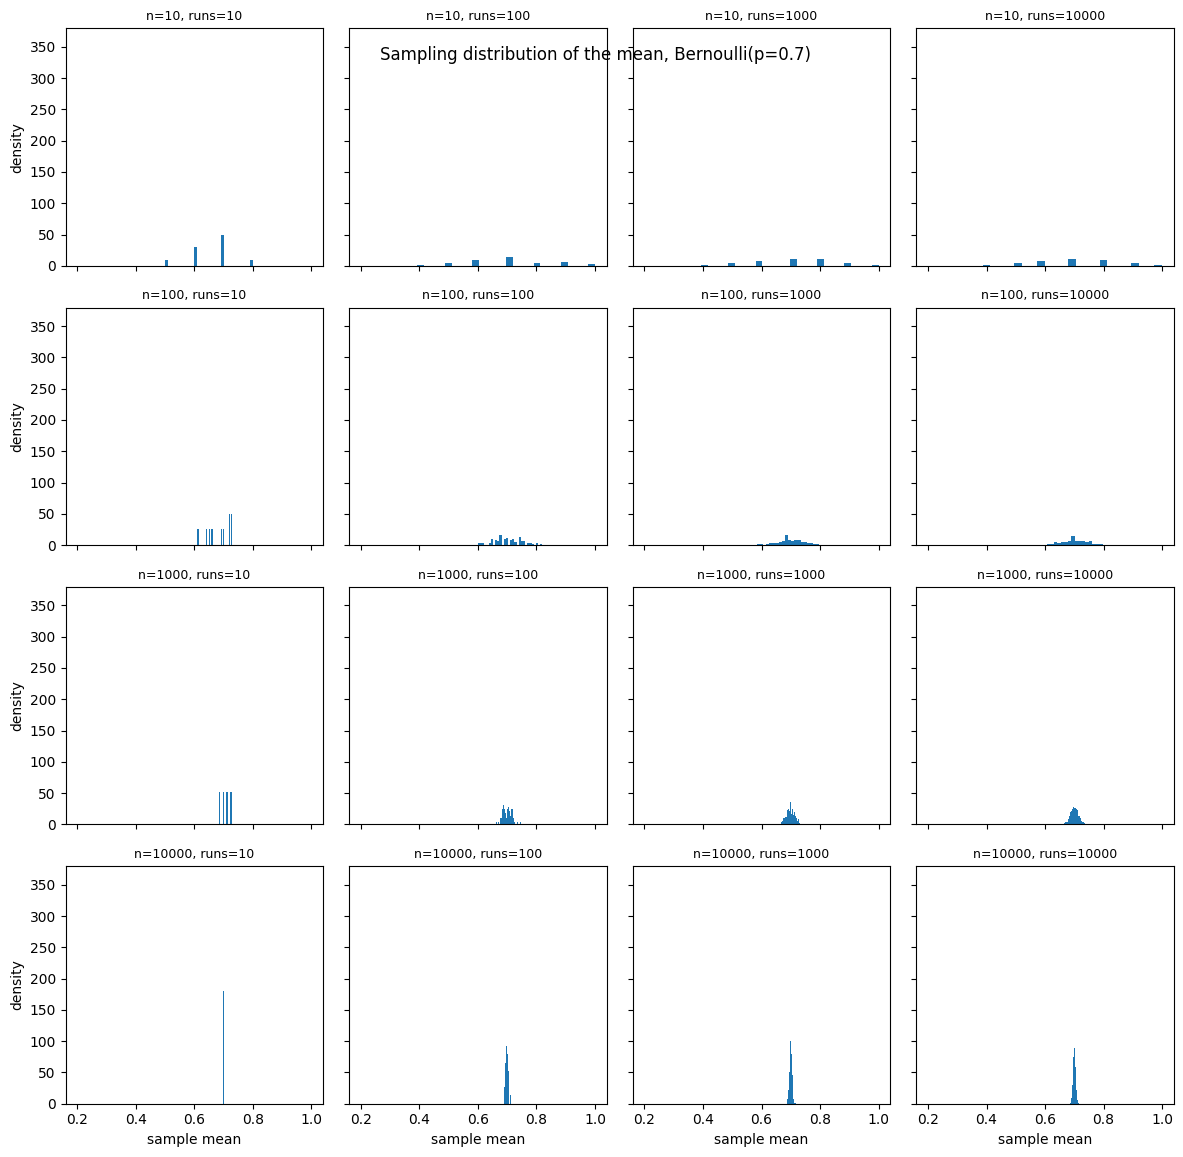

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from itertools import product

p = 0.7
n_list = [10, 100, 1000, 10000]         # observations per run
R_list = [10, 100, 1000, 10000]         # number of runs
outdir = "means"                         # folder for CSVs
os.makedirs(outdir, exist_ok=True)

def sample_means(n_obs: int, n_runs: int, p: float, seed: int = 0) -> np.ndarray:
    """
    Returns an array of length n_runs, where each entry represents the average outcome of n_obs Bernoulli(p) trials for that run.
    Efficient method: sample the number of successes from a Binomial(n_obs, p) distribution for each run, then divide by n_obs.
    """
    rng = np.random.default_rng(seed)
    successes = rng.binomial(n=n_obs, p=p, size=n_runs)  # counts of 1s per run
    return successes / n_obs

all_means = {}  # (n, R) -> np.ndarray of length R

for n, R in product(n_list, R_list):
    # stable, reproducible seed per combo:
    seed = (hash((n, R, p, 12345)) % (2**32 - 1))
    means = sample_means(n, R, p, seed=seed)
    all_means[(n, R)] = means

    # save: one mean per line, no header
    path = f"{outdir}/means_n{n}_runs{R}.csv"
    np.savetxt(path, means, fmt="%.6f")
    print("saved", path)


# Plotting
fig, axes = plt.subplots(len(n_list), len(R_list), figsize=(12, 12), sharex=True, sharey=True)
bins = 30  # enough to show shape; discrete at small n, smooth at large n

for i, n in enumerate(n_list):
    for j, R in enumerate(R_list):
        ax = axes[i, j]
        data = all_means[(n, R)]
        ax.hist(data, bins=bins, density=True)
        ax.set_title(f"n={n}, runs={R}", fontsize=9)
        if i == len(n_list) - 1:
            ax.set_xlabel("sample mean")
        if j == 0:
            ax.set_ylabel("density")

fig.suptitle("Sampling distribution of the mean, Bernoulli(p=0.7)", y=0.93)
plt.tight_layout()
plt.show()

# Increasing the number of flips per run (larger n) makes the sample mean 
# cluster more tightly around the true mean (0.7).  
# Increasing the number of runs (larger R) produces a smoother histogram.  
# Together, this demonstrates the Law of Large Numbers and the Central Limit Theorem.
